In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm

Reading the parent data file

In [4]:
blog_data = pd.read_csv("Desktop/Spring 2021/Machine Learning/Project/blogData_train.csv",header=None)
blog_data.shape

(52397, 281)

In [5]:
blog_data.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
276    float64
277    float64
278    float64
279    float64
280    float64
Length: 281, dtype: object

In [6]:
blog_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
count,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,...,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.0,52397.000000,52397.000000,52397.000000
mean,39.444167,46.806717,0.358914,339.853102,24.681661,15.214611,27.959159,0.002748,258.666030,5.829151,...,0.171327,0.162242,0.154455,0.096151,0.088917,0.119167,0.0,1.242094,0.769505,6.764719
std,79.121821,62.359996,6.840717,441.430109,69.598976,32.251189,38.584013,0.131903,321.348052,23.768317,...,0.376798,0.368676,0.361388,0.294800,0.284627,1.438194,0.0,27.497979,20.338052,37.706565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.285714,5.214318,0.000000,29.000000,0.000000,0.891566,3.075076,0.000000,22.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,10.630660,19.353120,0.000000,162.000000,4.000000,4.150685,11.051215,0.000000,121.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.304670,77.442830,0.000000,478.000000,15.000000,15.998589,45.701206,0.000000,387.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,1122.666600,559.432600,726.000000,2044.000000,1314.000000,442.666660,359.530060,14.000000,1424.000000,588.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,136.000000,0.0,1778.000000,1778.000000,1424.000000


In [7]:
blog_source = blog_data[[0,50,55,269,270,271,272,273,274,275]]
blog_source

,0,50,55,269,270,271,272,273,274,275
0,40.30467,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,40.30467,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,40.30467,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,40.30467,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,40.30467,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
52392,33.00000,33.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
52393,33.00000,33.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
52394,0.00000,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
52395,0.00000,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
blog_source[0] = blog_source[0].astype('category')
blog_source.head()

<ipython-input-8-88f0391f033e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blog_source[0] = blog_source[0].astype('category')


,0,50,55,269,270,271,272,273,274,275
0,40.30467,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,40.30467,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,40.30467,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,40.30467,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,40.30467,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Analyzing the total number of comments of top 10 blog sources

In [9]:
blog_source = blog_source.groupby(0, as_index=False).sum().sort_values(50,ascending=False)
blog_source

,0,50,55,269,270,271,272,273,274,275
430,546.629900,431291.0,3611.0,155.0,152.0,124.0,93.0,125.0,54.0,86.0
409,122.812930,267855.0,0.0,471.0,505.0,454.0,420.0,325.0,3.0,3.0
410,123.869190,255666.0,0.0,293.0,363.0,317.0,335.0,316.0,245.0,195.0
421,203.327700,168152.0,2025.0,126.0,138.0,149.0,183.0,147.0,63.0,21.0
429,336.621300,56889.0,1513.0,24.0,27.0,39.0,21.0,49.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2,0.020833,2.0,5.0,18.0,21.0,18.0,15.0,12.0,12.0,0.0
4,0.030769,2.0,0.0,3.0,24.0,17.0,12.0,9.0,0.0,0.0
1,0.013333,1.0,0.0,15.0,18.0,24.0,9.0,3.0,3.0,3.0
5,0.033333,1.0,0.0,3.0,6.0,3.0,0.0,3.0,3.0,12.0


We can see that the blog source with mean (546.6299) of total number_comments  has the highest number of comments and links.

In the below code, we try to analyze the tagret by studying its distribution plot, statistics, value counts and histogram.

In [10]:
target = (blog_data[280])
target

0         1.0
1         0.0
2         0.0
3         1.0
4        27.0
         ... 
52392     0.0
52393     0.0
52394     0.0
52395     0.0
52396     0.0
Name: 280, Length: 52397, dtype: float64

/Users/adityasharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='280'>

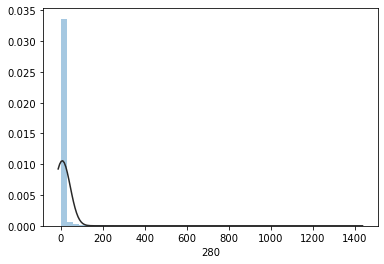

In [11]:
sns.distplot(target,fit=norm, kde=False)

In [12]:
target = blog_data[280]
target.describe()

count    52397.000000
mean         6.764719
std         37.706565
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       1424.000000
Name: 280, dtype: float64

In [13]:
target.value_counts()

0.0      33559
1.0       5775
2.0       2820
3.0       1654
4.0       1120
         ...  
344.0        1
324.0        1
370.0        1
733.0        1
263.0        1
Name: 280, Length: 438, dtype: int64

(array([5.1837e+04, 3.3000e+02, 1.3300e+02, 5.9000e+01, 1.7000e+01,
        1.4000e+01, 4.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([   0. ,  142.4,  284.8,  427.2,  569.6,  712. ,  854.4,  996.8,
        1139.2, 1281.6, 1424. ]),
 <BarContainer object of 10 artists>)

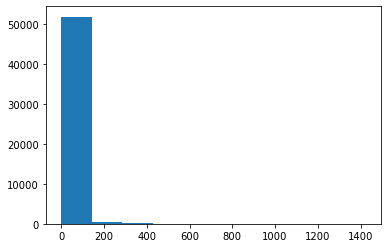

In [14]:
plt.hist(target,bins=10)

Exploring the 51st attribute, which is the total number of comments obtained on each blogpost before the basetime:

In [15]:
blog_data[50].value_counts()

0.0       16667
1.0        5508
2.0        3227
3.0        2210
4.0        1806
          ...  
625.0         1
868.0         1
883.0         1
1048.0        1
817.0         1
Name: 50, Length: 886, dtype: int64

(array([4.6954e+04, 2.9490e+03, 1.0510e+03, 5.0900e+02, 3.2100e+02,
        1.6500e+02, 1.2200e+02, 1.2100e+02, 4.6000e+01, 4.8000e+01,
        4.9000e+01, 1.4000e+01, 1.4000e+01, 1.9000e+01, 2.0000e+00,
        4.0000e+00, 1.0000e+00, 4.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([   0. ,  102.2,  204.4,  306.6,  408.8,  511. ,  613.2,  715.4,
         817.6,  919.8, 1022. , 1124.2, 1226.4, 1328.6, 1430.8, 1533. ,
        1635.2, 1737.4, 1839.6, 1941.8, 2044. ]),
 <BarContainer object of 20 artists>)

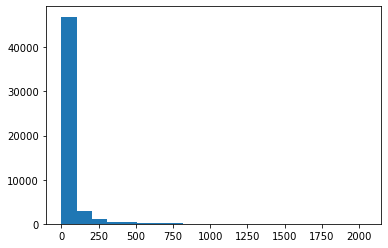

In [16]:
plt.hist(blog_data[50],bins=20)

Exploring the 52nd attribute which is the total number of comments in the last 24 hours from the basetime:

In [17]:
blog_data[51].value_counts()

0.0      26583
1.0       6172
2.0       3202
3.0       1983
4.0       1435
         ...  
971.0        1
455.0        1
506.0        1
389.0        1
405.0        1
Name: 51, Length: 579, dtype: int64

(array([4.9536e+04, 1.4430e+03, 5.8300e+02, 2.9200e+02, 1.8300e+02,
        1.3400e+02, 8.1000e+01, 5.5000e+01, 2.6000e+01, 1.2000e+01,
        2.2000e+01, 1.0000e+01, 6.0000e+00, 5.0000e+00, 3.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([   0. ,   71.2,  142.4,  213.6,  284.8,  356. ,  427.2,  498.4,
         569.6,  640.8,  712. ,  783.2,  854.4,  925.6,  996.8, 1068. ,
        1139.2, 1210.4, 1281.6, 1352.8, 1424. ]),
 <BarContainer object of 20 artists>)

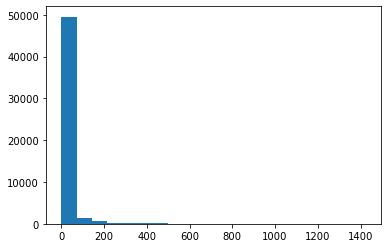

In [18]:
plt.hist(blog_data[51],bins=20)

Exploring 53rd attribute, which is total number of comments obtained between 48 hours to 24 hours before the basetime:

In [19]:
blog_data[52].value_counts()

0.0      32279
1.0       4104
2.0       2248
3.0       1457
4.0       1079
         ...  
594.0        1
717.0        1
822.0        1
684.0        1
714.0        1
Name: 52, Length: 569, dtype: int64

(array([4.9684e+04, 1.3810e+03, 5.4700e+02, 2.7600e+02, 1.6200e+02,
        1.2900e+02, 7.7000e+01, 5.1000e+01, 2.6000e+01, 1.2000e+01,
        2.2000e+01, 1.0000e+01, 6.0000e+00, 5.0000e+00, 3.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([   0. ,   71.2,  142.4,  213.6,  284.8,  356. ,  427.2,  498.4,
         569.6,  640.8,  712. ,  783.2,  854.4,  925.6,  996.8, 1068. ,
        1139.2, 1210.4, 1281.6, 1352.8, 1424. ]),
 <BarContainer object of 20 artists>)

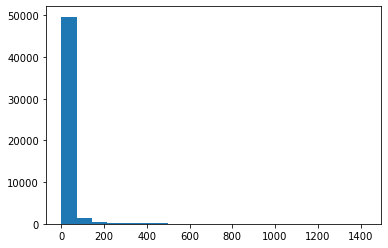

In [20]:
plt.hist(blog_data[52],bins=20)

Exploring 54th attribute, which is the total number of comments obtained in the first 24 hours of publishing of the blog:

In [21]:
blog_data[53].value_counts()

0.0       17523
1.0        5745
2.0        3305
3.0        2198
4.0        1717
          ...  
796.0         1
292.0         1
980.0         1
1121.0        1
726.0         1
Name: 53, Length: 677, dtype: int64

(array([4.7138e+04, 2.8510e+03, 1.0280e+03, 4.8600e+02, 3.4800e+02,
        2.2300e+02, 1.0200e+02, 7.0000e+01, 7.0000e+01, 3.6000e+01,
        1.4000e+01, 1.7000e+01, 0.0000e+00, 6.0000e+00, 4.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([   0. ,   96.6,  193.2,  289.8,  386.4,  483. ,  579.6,  676.2,
         772.8,  869.4,  966. , 1062.6, 1159.2, 1255.8, 1352.4, 1449. ,
        1545.6, 1642.2, 1738.8, 1835.4, 1932. ]),
 <BarContainer object of 20 artists>)

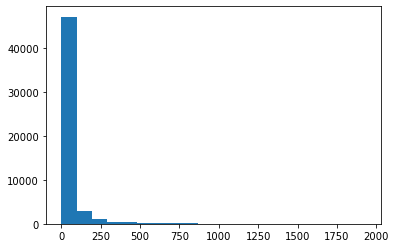

In [22]:
plt.hist(blog_data[53],bins=20)

Exploring 55th attribute, which is the difference between the attribute 52 and 53:

In [23]:
blog_data[54].value_counts()

 0.0      20655
 1.0       3619
-1.0       3610
-2.0       1903
 2.0       1743
          ...  
-453.0        1
 426.0        1
-250.0        1
 506.0        1
-840.0        1
Name: 54, Length: 1021, dtype: int64

(array([1.0000e+00, 3.0000e+00, 5.0000e+00, 1.0000e+01, 1.4000e+01,
        5.8000e+01, 1.5100e+02, 3.8700e+02, 2.1220e+03, 4.7677e+04,
        1.3320e+03, 3.4500e+02, 1.6600e+02, 6.9000e+01, 2.6000e+01,
        1.8000e+01, 5.0000e+00, 5.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([-1256. , -1122.1,  -988.2,  -854.3,  -720.4,  -586.5,  -452.6,
         -318.7,  -184.8,   -50.9,    83. ,   216.9,   350.8,   484.7,
          618.6,   752.5,   886.4,  1020.3,  1154.2,  1288.1,  1422. ]),
 <BarContainer object of 20 artists>)

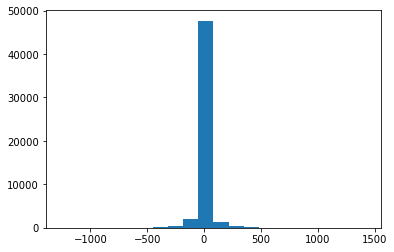

In [24]:
plt.hist(blog_data[54],bins=20)

Exploring the 56th attribute, which is the total number of trackbacks (links) obtained on each blogpost before the basetime:

In [25]:
blog_data[55].value_counts()

0.0     42661
1.0      4508
2.0      1879
3.0      1096
4.0       704
5.0       412
6.0       358
7.0       184
8.0       166
9.0       117
10.0       87
11.0       57
12.0       35
13.0       34
15.0       27
14.0       27
16.0       14
18.0        6
17.0        6
19.0        5
26.0        3
24.0        3
25.0        3
30.0        2
22.0        1
21.0        1
23.0        1
Name: 55, dtype: int64

(array([4.7169e+04, 1.8790e+03, 1.8000e+03, 4.1200e+02, 5.4200e+02,
        1.6600e+02, 2.0400e+02, 5.7000e+01, 6.9000e+01, 2.7000e+01,
        4.1000e+01, 6.0000e+00, 1.1000e+01, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 6.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ,
        16.5, 18. , 19.5, 21. , 22.5, 24. , 25.5, 27. , 28.5, 30. ]),
 <BarContainer object of 20 artists>)

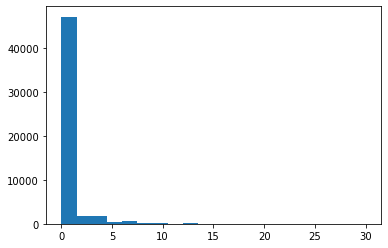

In [26]:
plt.hist(blog_data[55],bins=20)

Exploring the 57th attribute which is the total number of trackbacks (links) in the last 24 hours from the basetime:

In [27]:
blog_data[56].value_counts()

0.0     47668
1.0      2761
2.0       868
3.0       394
4.0       249
5.0       132
6.0       103
7.0        64
8.0        52
9.0        31
10.0       24
13.0       14
12.0       10
11.0        8
14.0        6
15.0        4
18.0        2
19.0        2
17.0        2
24.0        1
16.0        1
22.0        1
Name: 56, dtype: int64

(array([5.0429e+04, 8.6800e+02, 3.9400e+02, 2.4900e+02, 1.3200e+02,
        1.6700e+02, 5.2000e+01, 3.1000e+01, 2.4000e+01, 8.0000e+00,
        2.4000e+01, 6.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ,
        13.2, 14.4, 15.6, 16.8, 18. , 19.2, 20.4, 21.6, 22.8, 24. ]),
 <BarContainer object of 20 artists>)

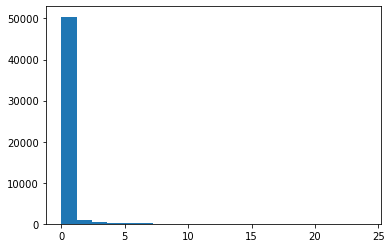

In [28]:
plt.hist(blog_data[56],bins=20)

Exploring 58th attribute, which is total number of trackbacks (links) obtained between 48 hours to 24 hours before the basetime:

In [29]:
blog_data[57].value_counts()

0.0     48194
1.0      2307
2.0       812
3.0       380
4.0       246
5.0       132
6.0       104
7.0        64
8.0        52
9.0        31
10.0       24
13.0       14
12.0       10
11.0        8
14.0        6
15.0        4
18.0        2
19.0        2
17.0        2
24.0        1
16.0        1
22.0        1
Name: 57, dtype: int64

(array([5.0501e+04, 8.1200e+02, 3.8000e+02, 2.4600e+02, 1.3200e+02,
        1.6800e+02, 5.2000e+01, 3.1000e+01, 2.4000e+01, 8.0000e+00,
        2.4000e+01, 6.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ,
        13.2, 14.4, 15.6, 16.8, 18. , 19.2, 20.4, 21.6, 22.8, 24. ]),
 <BarContainer object of 20 artists>)

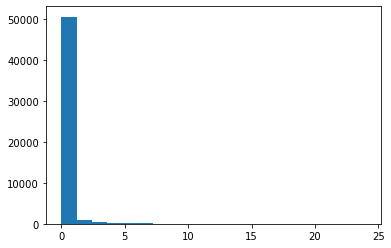

In [30]:
plt.hist(blog_data[57],bins=20)

Exploring 59th attribute, which is the total number of trackbacks (links) obtained in the first 24 hours of publishing of the blog:

In [31]:
blog_data[58].value_counts()

0.0     43275
1.0      4303
2.0      1791
3.0      1021
4.0       634
5.0       351
6.0       340
7.0       166
8.0       150
9.0       107
10.0       73
13.0       37
11.0       34
14.0       31
12.0       31
15.0       20
19.0        6
18.0        5
16.0        5
25.0        5
17.0        5
22.0        3
26.0        2
24.0        2
Name: 58, dtype: int64

(array([4.7578e+04, 1.7910e+03, 1.0210e+03, 9.8500e+02, 3.4000e+02,
        1.6600e+02, 2.5700e+02, 7.3000e+01, 3.4000e+01, 3.1000e+01,
        6.8000e+01, 2.0000e+01, 5.0000e+00, 1.0000e+01, 6.0000e+00,
        0.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00, 7.0000e+00]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. ]),
 <BarContainer object of 20 artists>)

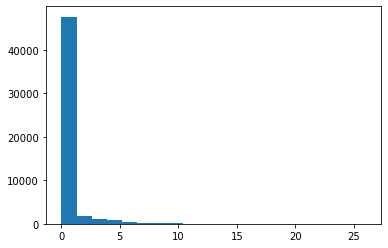

In [32]:
plt.hist(blog_data[58],bins=20)

Exploring 60th attribute, which is the difference between the attribute 57 and 58:

In [33]:
blog_data[59].value_counts()

 0.0     44881
 1.0      2172
-1.0      2052
 2.0       719
-2.0       680
 3.0       346
-3.0       322
 4.0       215
-4.0       211
-5.0       124
 5.0       119
 6.0        98
-6.0        88
 7.0        54
 8.0        51
-7.0        45
-8.0        41
 9.0        28
-9.0        26
 10.0       23
-10.0       17
 13.0       14
-11.0       14
 12.0        8
-12.0        7
-13.0        5
 14.0        5
-15.0        4
 11.0        4
 15.0        4
-14.0        3
 18.0        2
 19.0        2
-18.0        2
 17.0        2
-17.0        2
-19.0        2
 22.0        1
-16.0        1
 16.0        1
-20.0        1
 23.0        1
Name: 59, dtype: int64

(array([5.0000e+00, 3.0000e+00, 7.0000e+00, 1.2000e+01, 3.1000e+01,
        6.7000e+01, 2.5700e+02, 5.3300e+02, 2.7320e+03, 4.7053e+04,
        1.0650e+03, 3.3400e+02, 1.5200e+02, 1.0200e+02, 1.2000e+01,
        1.9000e+01, 5.0000e+00, 4.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([-20.  , -17.85, -15.7 , -13.55, -11.4 ,  -9.25,  -7.1 ,  -4.95,
         -2.8 ,  -0.65,   1.5 ,   3.65,   5.8 ,   7.95,  10.1 ,  12.25,
         14.4 ,  16.55,  18.7 ,  20.85,  23.  ]),
 <BarContainer object of 20 artists>)

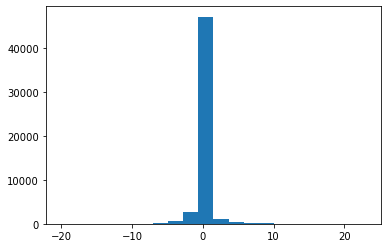

In [34]:
plt.hist(blog_data[59],bins=20)

Exploring 61st attribute, which is the length of time between the publication of the blog post
and basetime

In [35]:
blog_data[60].value_counts()

62.0    1396
14.0    1393
38.0    1393
13.0    1314
61.0    1309
        ... 
19.0      86
67.0      85
68.0      53
44.0      51
20.0      51
Name: 60, Length: 73, dtype: int64

(array([1308.,  544., 1318.,  696., 1561.,  790., 1913., 1113., 1227.,
        2707., 1247., 1701.,  300.,  137.,   97.,  613.,  621.,  687.,
        1239.,  622., 1447.,  802., 1693., 1006., 1114., 2539., 1393.,
        2368.,  591.,  375.,   51.,  297.,  405.,  631., 1223.,  702.,
        1307.,  746., 1594.,  908., 2116., 1223., 1309., 2649., 1110.,
         883.,   85.,  151.,  205., 1033.]),
 array([ 0.  ,  1.44,  2.88,  4.32,  5.76,  7.2 ,  8.64, 10.08, 11.52,
        12.96, 14.4 , 15.84, 17.28, 18.72, 20.16, 21.6 , 23.04, 24.48,
        25.92, 27.36, 28.8 , 30.24, 31.68, 33.12, 34.56, 36.  , 37.44,
        38.88, 40.32, 41.76, 43.2 , 44.64, 46.08, 47.52, 48.96, 50.4 ,
        51.84, 53.28, 54.72, 56.16, 57.6 , 59.04, 60.48, 61.92, 63.36,
        64.8 , 66.24, 67.68, 69.12, 70.56, 72.  ]),
 <BarContainer object of 50 artists>)

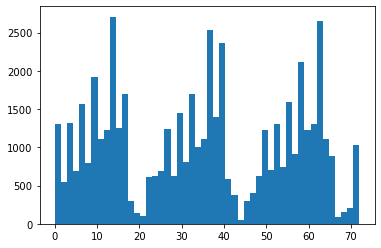

In [36]:
plt.hist(blog_data[60],bins=50)

Exploring 62nd attribute, which is the overall length of the blog post:

In [37]:
blog_data[61].value_counts()

0.0        12750
4407.0        48
341.0         37
350.0         34
3164.0        33
           ...  
8581.0         1
12118.0        1
13902.0        1
14246.0        1
5764.0         1
Name: 61, Length: 6442, dtype: int64

(array([3.3025e+04, 1.2660e+04, 3.8270e+03, 1.2000e+03, 6.3300e+02,
        3.8000e+02, 2.9300e+02, 1.2500e+02, 1.0100e+02, 4.3000e+01,
        3.4000e+01, 3.3000e+01, 2.1000e+01, 4.0000e+00, 0.0000e+00,
        0.0000e+00, 6.0000e+00, 6.0000e+00, 0.0000e+00, 6.0000e+00]),
 array([    0. ,  2894.7,  5789.4,  8684.1, 11578.8, 14473.5, 17368.2,
        20262.9, 23157.6, 26052.3, 28947. , 31841.7, 34736.4, 37631.1,
        40525.8, 43420.5, 46315.2, 49209.9, 52104.6, 54999.3, 57894. ]),
 <BarContainer object of 20 artists>)

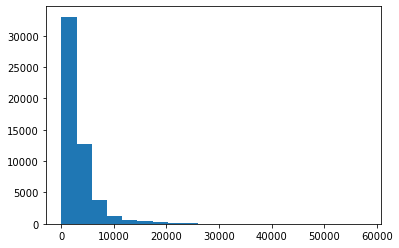

In [38]:
plt.hist(blog_data[61],bins=20)

Collectively analyzing all the above explored basic features (attributes 51 to 62) along with the output feature:

In [39]:
Basic_features = blog_data.iloc[:, range(50,63)]
Basic_features[280] = blog_data[280]
Basic_features

<ipython-input-39-54d692862994>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Basic_features[280] = blog_data[280]


,50,51,52,53,54,55,56,57,58,59,60,61,62,280
0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,1.0
1,6.0,2.0,4.0,5.0,-2.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0
2,6.0,2.0,4.0,5.0,-2.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0
3,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,1.0
4,3.0,1.0,2.0,2.0,-1.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52392,33.0,0.0,33.0,33.0,-33.0,0.0,0.0,0.0,0.0,0.0,38.0,3137.0,0.0,0.0
52393,33.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,3137.0,0.0,0.0
52394,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,13.0,0.0,0.0,0.0
52395,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,-2.0,37.0,0.0,0.0,0.0


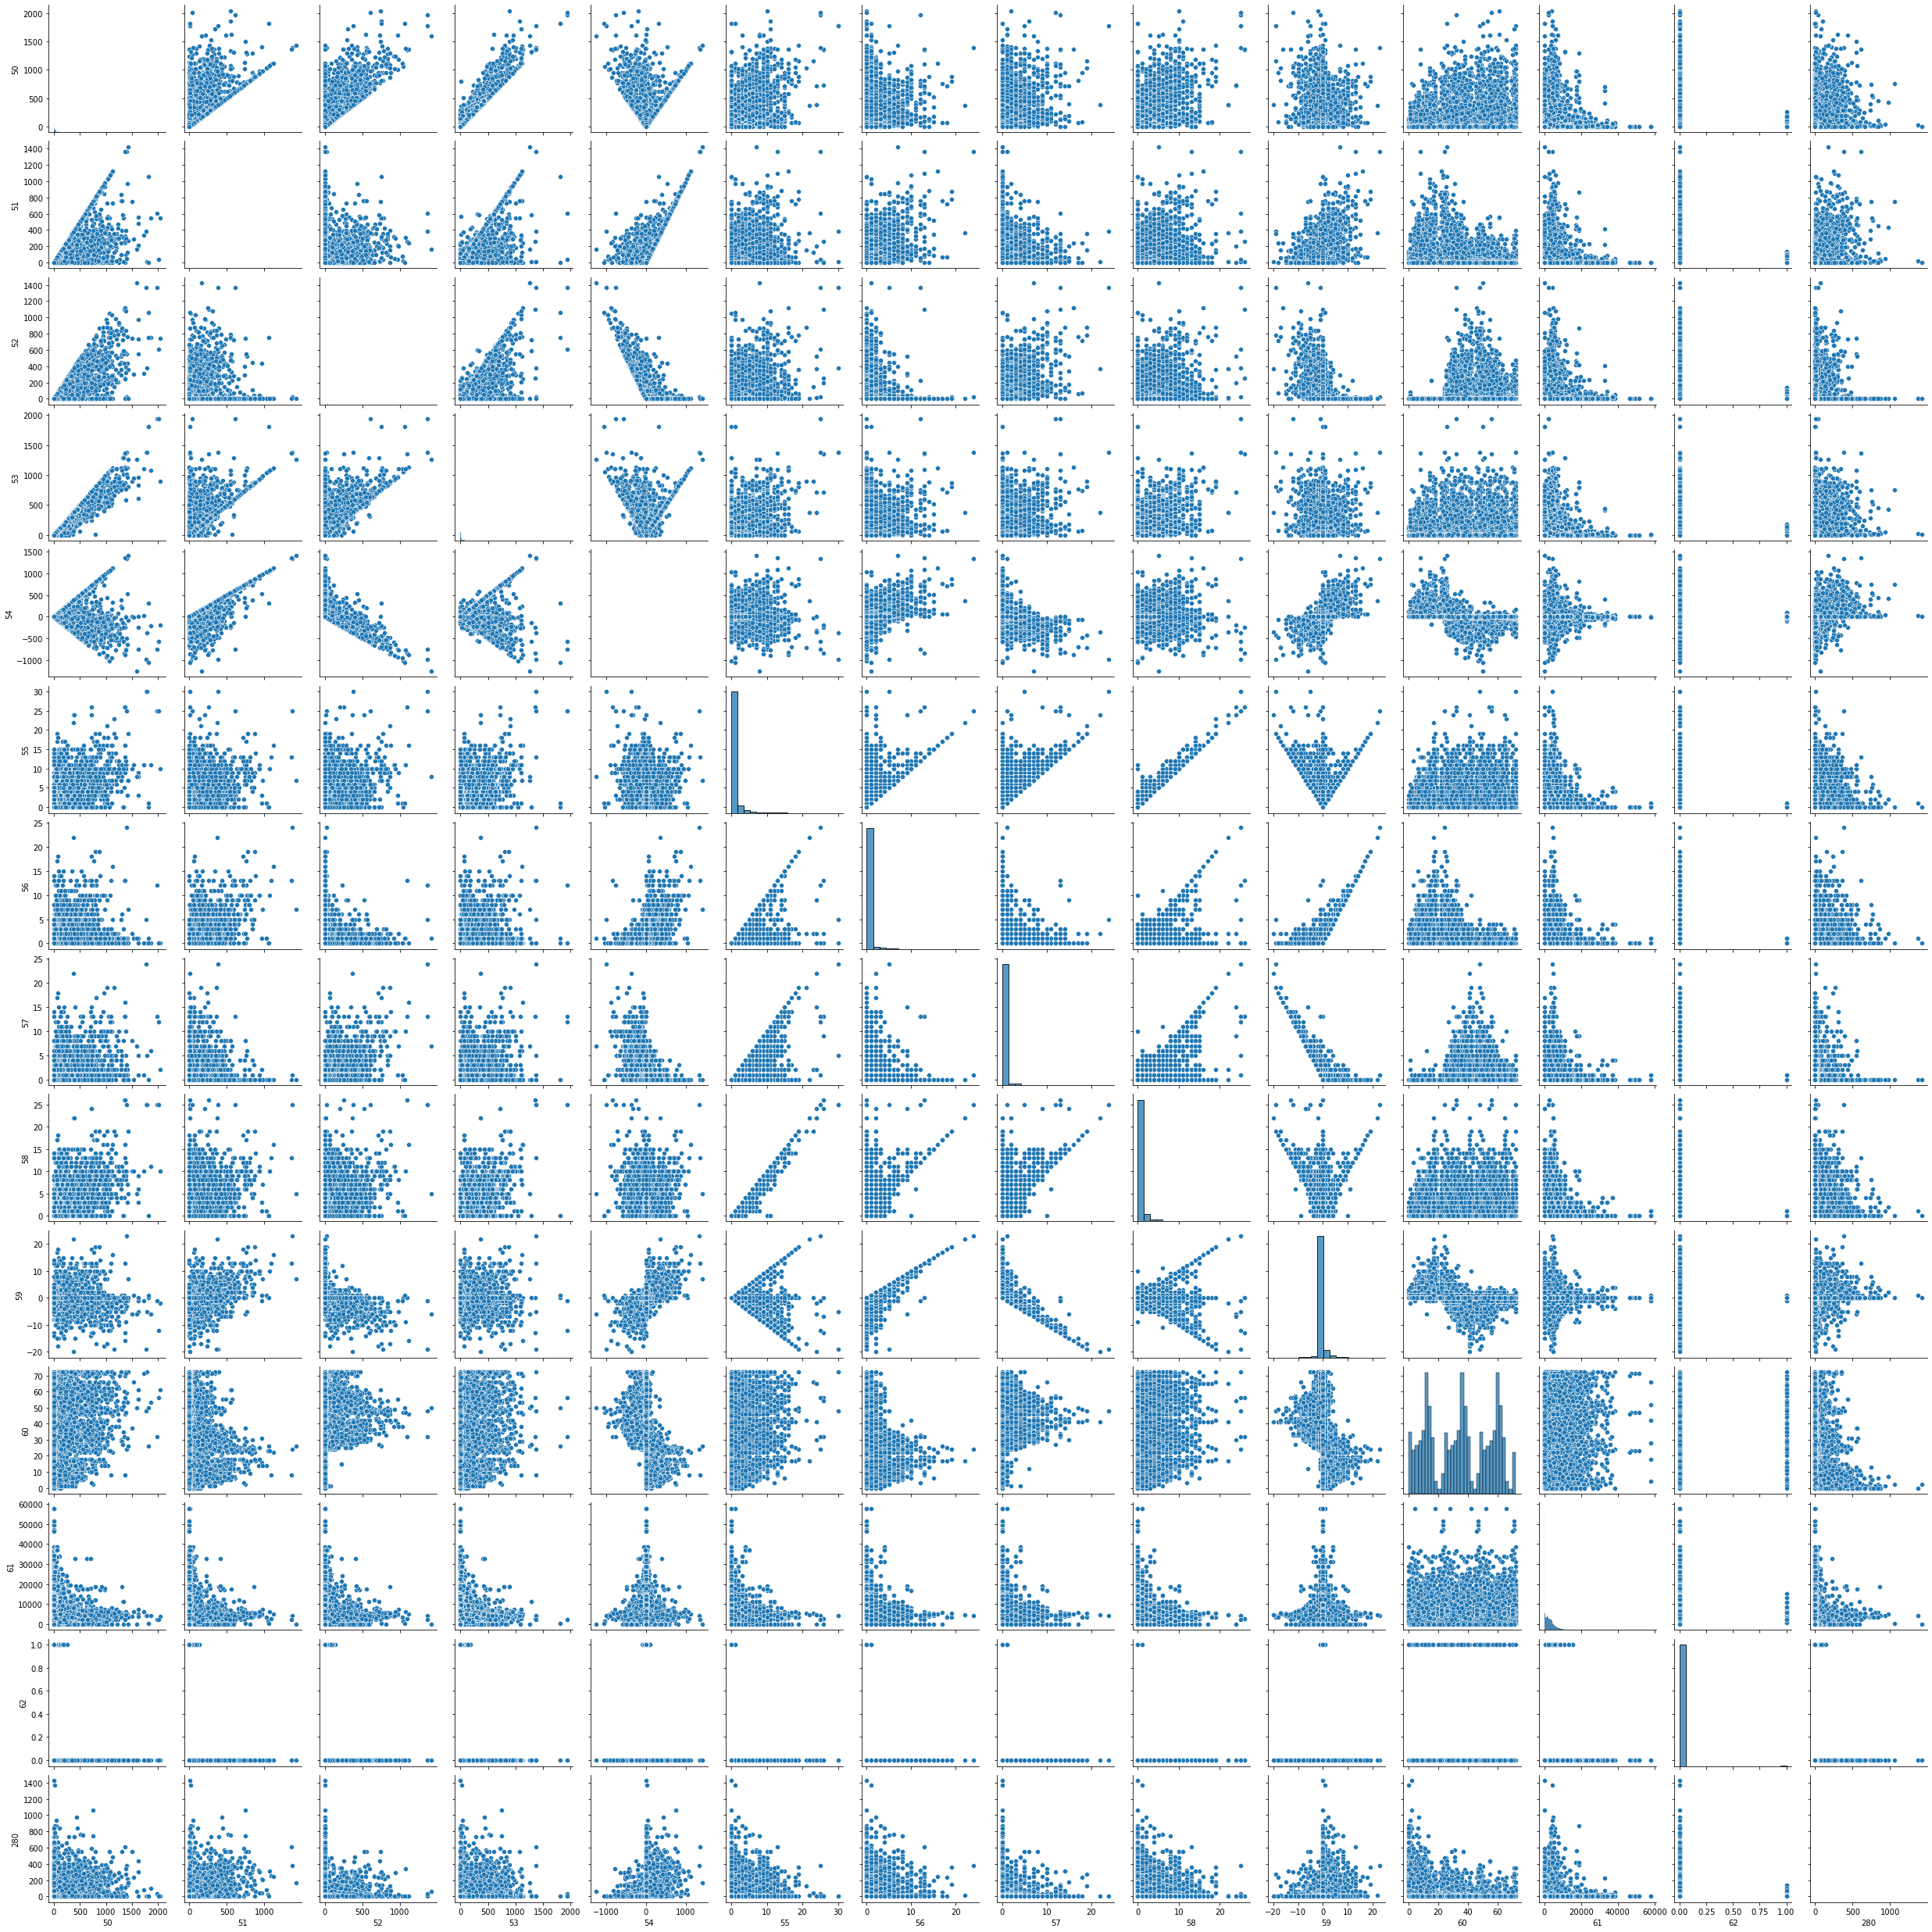

In [40]:
sns.pairplot(Basic_features)

Computing and analyzing the pairwise correlation of all the basic features along with the output feature:

In [41]:
Basic_features.corr()

,50,51,52,53,54,55,56,57,58,59,60,61,62,280
50,1.000000,0.665980,0.752362,0.975584,-0.059468,0.536990,0.292746,0.379177,0.531187,-0.062939,0.084412,0.081478,0.003399,0.314446
51,0.665980,1.000000,0.260794,0.683279,0.618184,0.380394,0.520831,0.141801,0.390850,0.285941,-0.155544,0.052223,0.003094,0.472061
52,0.752362,0.260794,1.000000,0.709219,-0.597614,0.406802,0.065082,0.536317,0.395204,-0.351579,0.104308,0.049854,0.003163,0.117642
53,0.975584,0.683279,0.709219,1.000000,-0.009972,0.529869,0.325986,0.361766,0.533090,-0.024928,0.058481,0.080159,0.001405,0.314177
54,-0.059468,0.618184,-0.597614,-0.009972,1.000000,-0.015295,0.379573,-0.318905,0.002832,0.523740,-0.214112,0.002780,-0.000006,0.296273
55,0.536990,0.380394,0.406802,0.529869,-0.015295,1.000000,0.620317,0.678932,0.984851,-0.040363,0.070699,0.023898,-0.008481,0.191917
56,0.292746,0.520831,0.065082,0.325986,0.379573,0.620317,1.000000,0.110158,0.622109,0.670073,-0.139330,0.017045,-0.005093,0.260903
57,0.379177,0.141801,0.536317,0.361766,-0.318905,0.678932,0.110158,1.000000,0.660430,-0.663964,0.081669,0.015607,-0.005668,0.067141
58,0.531187,0.390850,0.395204,0.533090,0.002832,0.984851,0.622109,0.660430,1.000000,-0.025197,0.049621,0.020501,-0.009709,0.198638
59,-0.062939,0.285941,-0.351579,-0.024928,0.523740,-0.040363,0.670073,-0.663964,-0.025197,1.000000,-0.165818,0.001168,0.000401,0.146145


<AxesSubplot:>

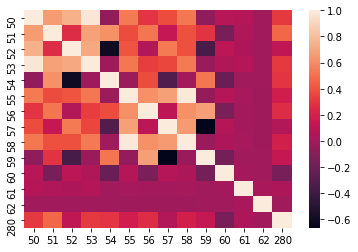

In [42]:
sns.heatmap(Basic_features.corr())

In [43]:
index = blog_data.sample(frac=1)

# Defining the size for our training set
train_size = int(0.7 * len(blog_data))

# Splitting our dataset 
train_df = blog_data[:train_size]
test_df = blog_data[train_size:]

In [44]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,40.304670,53.845657,0.0,401.0,15.0,15.524160,32.441880,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.304670,53.845657,0.0,401.0,15.0,15.524160,32.441880,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.304670,53.845657,0.0,401.0,15.0,15.524160,32.441880,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.304670,53.845657,0.0,401.0,15.0,15.524160,32.441880,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.304670,53.845657,0.0,401.0,15.0,15.524160,32.441880,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36672,0.360731,0.741781,0.0,4.0,0.0,0.146119,0.454928,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
36673,0.360731,0.741781,0.0,4.0,0.0,0.146119,0.454928,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36674,0.360731,0.741781,0.0,4.0,0.0,0.146119,0.454928,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36675,0.360731,0.741781,0.0,4.0,0.0,0.146119,0.454928,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
36677,0.360731,0.741781,0.0,4.0,0.0,0.146119,0.454928,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36678,0.360731,0.741781,0.0,4.0,0.0,0.146119,0.454928,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36679,0.360731,0.741781,0.0,4.0,0.0,0.146119,0.454928,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36680,0.360731,0.741781,0.0,4.0,0.0,0.146119,0.454928,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36681,0.360731,0.741781,0.0,4.0,0.0,0.146119,0.454928,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52392,33.000000,0.000000,33.0,33.0,33.0,11.000000,15.556349,0.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52393,33.000000,0.000000,33.0,33.0,33.0,11.000000,15.556349,0.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52394,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52395,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
l_X_train = train_df.drop(280,axis=1)
l_X_train

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,40.304670,53.845657,0.0,401.0,15.0,15.524160,32.441880,0.0,377.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40.304670,53.845657,0.0,401.0,15.0,15.524160,32.441880,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.304670,53.845657,0.0,401.0,15.0,15.524160,32.441880,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.304670,53.845657,0.0,401.0,15.0,15.524160,32.441880,0.0,377.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40.304670,53.845657,0.0,401.0,15.0,15.524160,32.441880,0.0,377.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36672,0.360731,0.741781,0.0,4.0,0.0,0.146119,0.454928,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36673,0.360731,0.741781,0.0,4.0,0.0,0.146119,0.454928,0.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36674,0.360731,0.741781,0.0,4.0,0.0,0.146119,0.454928,0.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36675,0.360731,0.741781,0.0,4.0,0.0,0.146119,0.454928,0.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
l_X_test = test_df.drop(280,axis=1)
l_X_test

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
36677,0.360731,0.741781,0.0,4.0,0.0,0.146119,0.454928,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36678,0.360731,0.741781,0.0,4.0,0.0,0.146119,0.454928,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36679,0.360731,0.741781,0.0,4.0,0.0,0.146119,0.454928,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36680,0.360731,0.741781,0.0,4.0,0.0,0.146119,0.454928,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36681,0.360731,0.741781,0.0,4.0,0.0,0.146119,0.454928,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52392,33.000000,0.000000,33.0,33.0,33.0,11.000000,15.556349,0.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52393,33.000000,0.000000,33.0,33.0,33.0,11.000000,15.556349,0.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52394,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52395,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
y_train = train_df[280]
y_train

0         1.0
1         0.0
2         0.0
3         1.0
4        27.0
         ... 
36672     0.0
36673     0.0
36674     0.0
36675     1.0
36676     0.0
Name: 280, Length: 36677, dtype: float64

In [49]:
y_test = test_df[280]
y_test

36677    1.0
36678    0.0
36679    0.0
36680    0.0
36681    0.0
        ... 
52392    0.0
52393    0.0
52394    0.0
52395    0.0
52396    0.0
Name: 280, Length: 15720, dtype: float64

SELECTING THE IMPORTANT FEATURES:

In [50]:
X_train = train_df.drop(range(0,50),axis=1,inplace=True)
X_train

/Users/adityasharma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [51]:
X_train = train_df.drop([276,277,278,279,280],axis=1,inplace=True)
X_train

In [52]:
X_train = train_df.drop(range(62,262),axis=1)
X_train

,50,51,52,53,54,55,56,57,58,59,...,266,267,268,269,270,271,272,273,274,275
0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6.0,2.0,4.0,5.0,-2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,6.0,2.0,4.0,5.0,-2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.0,1.0,2.0,2.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36672,2.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [53]:
X_test = test_df.drop(range(0,50),axis=1, inplace = True)
X_test

/Users/adityasharma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
X_test = test_df.drop([276,277,278,279,280],axis=1, inplace = True)
X_test

In [55]:
X_test = test_df.drop(range(62,262), axis=1)
X_test

,50,51,52,53,54,55,56,57,58,59,...,266,267,268,269,270,271,272,273,274,275
36677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
36678,1.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
36679,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
36680,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
36681,1.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52392,33.0,0.0,33.0,33.0,-33.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
52393,33.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
52394,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
52395,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,-2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [56]:
X_train_Norm = (X_train - X_train.mean())/X_train.std() # Normalizing the input features in our training data
X_train_Norm

,50,51,52,53,54,55,56,57,58,59,...,266,267,268,269,270,271,272,273,274,275
0,-0.382981,-0.265771,-0.278541,-0.396681,0.005938,-0.314656,-0.214853,-0.203229,-0.305981,-0.009898,...,2.213444,-0.441672,-0.399862,-0.437831,-0.454264,-0.451510,2.243934,-0.432247,-0.315426,-0.305023
1,-0.351323,-0.265771,-0.216170,-0.368689,-0.044754,-0.314656,-0.214853,-0.203229,-0.305981,-0.009898,...,2.213444,-0.441672,-0.399862,-0.437831,-0.454264,2.214731,-0.445634,-0.432247,-0.315426,-0.305023
2,-0.351323,-0.265771,-0.216170,-0.368689,-0.044754,-0.314656,-0.214853,-0.203229,-0.305981,-0.009898,...,2.213444,-0.441672,-0.399862,-0.437831,-0.454264,2.214731,-0.445634,-0.432247,-0.315426,-0.305023
3,-0.382981,-0.265771,-0.278541,-0.396681,0.005938,-0.314656,-0.214853,-0.203229,-0.305981,-0.009898,...,2.213444,-0.441672,-0.399862,-0.437831,-0.454264,-0.451510,2.243934,-0.432247,-0.315426,-0.305023
4,-0.375067,-0.281050,-0.247356,-0.396681,-0.032081,-0.314656,-0.214853,-0.203229,-0.305981,-0.009898,...,-0.451772,2.264060,-0.399862,-0.437831,-0.454264,-0.451510,2.243934,-0.432247,-0.315426,-0.305023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36672,-0.382981,-0.296329,-0.262949,-0.406011,-0.032081,-0.314656,-0.214853,-0.203229,-0.305981,-0.009898,...,-0.451772,-0.441672,-0.399862,-0.437831,-0.454264,-0.451510,-0.445634,-0.432247,-0.315426,3.278357
36673,-0.398810,-0.296329,-0.278541,-0.415341,-0.019408,-0.314656,-0.214853,-0.203229,-0.305981,-0.009898,...,-0.451772,-0.441672,-0.399862,-0.437831,-0.454264,2.214731,-0.445634,-0.432247,-0.315426,-0.305023
36674,-0.398810,-0.296329,-0.278541,-0.415341,-0.019408,-0.314656,-0.214853,-0.203229,-0.305981,-0.009898,...,2.213444,-0.441672,-0.399862,-0.437831,-0.454264,2.214731,-0.445634,-0.432247,-0.315426,-0.305023
36675,-0.398810,-0.296329,-0.278541,-0.415341,-0.019408,-0.314656,-0.214853,-0.203229,-0.305981,-0.009898,...,-0.451772,2.264060,-0.399862,-0.437831,-0.454264,2.214731,-0.445634,-0.432247,-0.315426,-0.305023


In [57]:
X_test_Norm = (X_test - X_train.mean())/X_train.std() # Normalizing the testing data using the mean and std. deviation of training data
X_test_Norm

,50,51,52,53,54,55,56,57,58,59,...,266,267,268,269,270,271,272,273,274,275
36677,-0.398810,-0.296329,-0.278541,-0.415341,-0.019408,-0.314656,-0.214853,-0.203229,-0.305981,-0.009898,...,-0.451772,-0.441672,-0.399862,-0.437831,2.201304,-0.45151,-0.445634,-0.432247,-0.315426,-0.305023
36678,-0.390896,-0.296329,-0.262949,-0.406011,-0.032081,-0.314656,-0.214853,-0.203229,-0.305981,-0.009898,...,-0.451772,-0.441672,-0.399862,2.283922,-0.454264,-0.45151,-0.445634,-0.432247,-0.315426,-0.305023
36679,-0.390896,-0.281050,-0.278541,-0.415341,-0.006735,-0.314656,-0.214853,-0.203229,-0.305981,-0.009898,...,-0.451772,-0.441672,-0.399862,-0.437831,2.201304,-0.45151,-0.445634,-0.432247,-0.315426,-0.305023
36680,-0.390896,-0.296329,-0.278541,-0.406011,-0.019408,-0.314656,-0.214853,-0.203229,-0.305981,-0.009898,...,-0.451772,-0.441672,-0.399862,2.283922,-0.454264,-0.45151,-0.445634,-0.432247,-0.315426,-0.305023
36681,-0.390896,-0.296329,-0.262949,-0.415341,-0.032081,-0.314656,-0.214853,-0.203229,-0.305981,-0.009898,...,2.213444,-0.441672,-0.399862,-0.437831,2.201304,-0.45151,-0.445634,-0.432247,-0.315426,-0.305023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52392,-0.137633,-0.296329,0.236022,-0.107436,-0.437617,-0.314656,-0.214853,-0.203229,-0.305981,-0.009898,...,-0.451772,-0.441672,-0.399862,2.283922,-0.454264,-0.45151,-0.445634,-0.432247,-0.315426,-0.305023
52393,-0.137633,-0.296329,-0.278541,-0.107436,-0.019408,-0.314656,-0.214853,-0.203229,-0.305981,-0.009898,...,-0.451772,-0.441672,-0.399862,2.283922,-0.454264,-0.45151,-0.445634,-0.432247,-0.315426,-0.305023
52394,-0.398810,-0.296329,-0.278541,-0.415341,-0.019408,0.903675,1.969531,-0.203229,0.987601,1.636532,...,2.213444,-0.441672,-0.399862,-0.437831,-0.454264,-0.45151,2.243934,-0.432247,-0.315426,-0.305023
52395,-0.398810,-0.296329,-0.278541,-0.415341,-0.019408,0.903675,-0.214853,1.997492,0.987601,-1.656328,...,-0.451772,2.264060,-0.399862,-0.437831,-0.454264,-0.45151,2.243934,-0.432247,-0.315426,-0.305023


In [58]:
X_train_corr =(1/36677)*X_train_Norm.T.dot(X_train_Norm) # Computing the correlation matrix of the training data
X_train_corr

,50,51,52,53,54,55,56,57,58,59,...,266,267,268,269,270,271,272,273,274,275
50,0.999973,0.661686,0.750144,0.974737,-0.060836,0.563851,0.305886,0.400097,0.557593,-0.068771,...,0.010012,0.000400,-0.005926,0.020934,0.014920,0.009554,-0.004735,-0.005729,-0.030336,-0.015563
51,0.661686,0.999973,0.258510,0.681278,0.619330,0.400868,0.545539,0.153562,0.413365,0.296303,...,-0.001334,-0.008458,-0.037361,0.008547,0.011874,0.006837,-0.006376,-0.000502,-0.018188,-0.008614
52,0.750144,0.258510,0.999973,0.705173,-0.598300,0.425335,0.068198,0.562266,0.413232,-0.369247,...,0.010404,0.001367,0.012431,0.009976,0.011129,0.008504,-0.004577,-0.003916,-0.018951,-0.008890
53,0.974737,0.681278,0.705173,0.999973,-0.008036,0.554027,0.343942,0.379807,0.556093,-0.024907,...,0.010757,0.002693,-0.008461,0.023952,0.016783,0.012568,-0.001552,-0.009521,-0.036534,-0.019020
54,-0.060836,0.619330,-0.598300,-0.008036,0.999973,-0.013187,0.397073,-0.329607,0.007016,0.545874,...,-0.009562,-0.008127,-0.041093,-0.001019,0.000803,-0.001241,-0.001569,0.002766,0.000317,0.000080
55,0.563851,0.400868,0.425335,0.554027,-0.013187,0.999973,0.619090,0.678251,0.987070,-0.040797,...,0.002908,0.004876,-0.004172,0.004902,0.004466,0.013940,-0.012150,0.001437,-0.015885,-0.000573
56,0.305886,0.545539,0.068198,0.343942,0.397073,0.619090,0.999973,0.113323,0.625232,0.668926,...,-0.004682,0.002679,-0.030975,0.002542,0.001882,0.010257,-0.008686,0.000094,-0.008605,0.000624
57,0.400097,0.153562,0.562266,0.379807,-0.329607,0.678251,0.113323,0.999973,0.661705,-0.662697,...,0.007017,0.000020,0.017160,0.003781,0.003763,0.009748,-0.007454,-0.001929,-0.010771,0.000364
58,0.557593,0.413365,0.413232,0.556093,0.007016,0.987070,0.625232,0.661705,0.999973,-0.023788,...,0.005353,0.005568,-0.004341,0.003641,0.007770,0.015080,-0.010666,0.001039,-0.019433,-0.002714
59,-0.068771,0.296303,-0.369247,-0.024907,0.545874,-0.040797,0.668926,-0.662697,-0.023788,0.999973,...,-0.008779,0.002005,-0.036185,-0.000913,-0.001397,0.000438,-0.000970,0.001514,0.001572,0.000198


Text(0.5, 1.0, 'Correlation matrix')

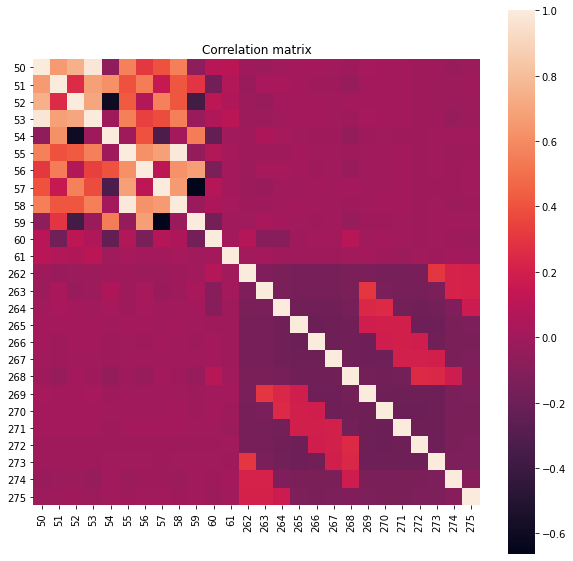

In [59]:
plt.figure(figsize=(10,10))  # Plotting a heatmap of the correlation matrix
sns.heatmap(X_train_corr, vmax=1, square=True,annot=False)
plt.title('Correlation matrix')

In [60]:
u,s,v = np.linalg.svd(X_train_corr) # Calculating eigen values and their respective eigen vectors 
eig_values, eig_vectors = s, u
eig_values, eig_vectors

(array([4.70274907e+00, 2.89899466e+00, 2.08462228e+00, 1.97546936e+00,
        1.50883578e+00, 1.47357085e+00, 1.36536754e+00, 1.33868505e+00,
        1.30771274e+00, 1.02053433e+00, 9.72054828e-01, 9.67176940e-01,
        9.34660256e-01, 8.72834684e-01, 8.34979901e-01, 7.77365156e-01,
        3.39114384e-01, 2.57238596e-01, 2.42948790e-01, 9.16817499e-02,
        2.20592672e-02, 1.06348856e-02, 6.73261317e-16, 4.09987197e-16,
        4.09987197e-16, 2.49664576e-16]),
 array([[-4.03167194e-01, -1.83646353e-02,  6.68070332e-04,
         -1.79541834e-03,  1.58622606e-02,  2.02206728e-02,
         -9.22960286e-02,  6.27387890e-02, -3.60132117e-01,
          1.96037166e-02,  7.15261983e-02, -7.94617223e-02,
          6.18225561e-02, -2.46713400e-03,  1.19157243e-02,
         -7.02077278e-03,  6.16192374e-03, -6.36091689e-02,
          2.59481582e-01, -1.72894097e-01, -7.00242284e-01,
          2.94660263e-01, -2.98894036e-15, -3.03605151e-16,
         -2.61728578e-15, -3.66420009e-17],
  

In [61]:
np.sum(eig_values) # Calculating the sum of eigen values 

25.999291108867475

Text(0.5, 0, 'Dimensions')

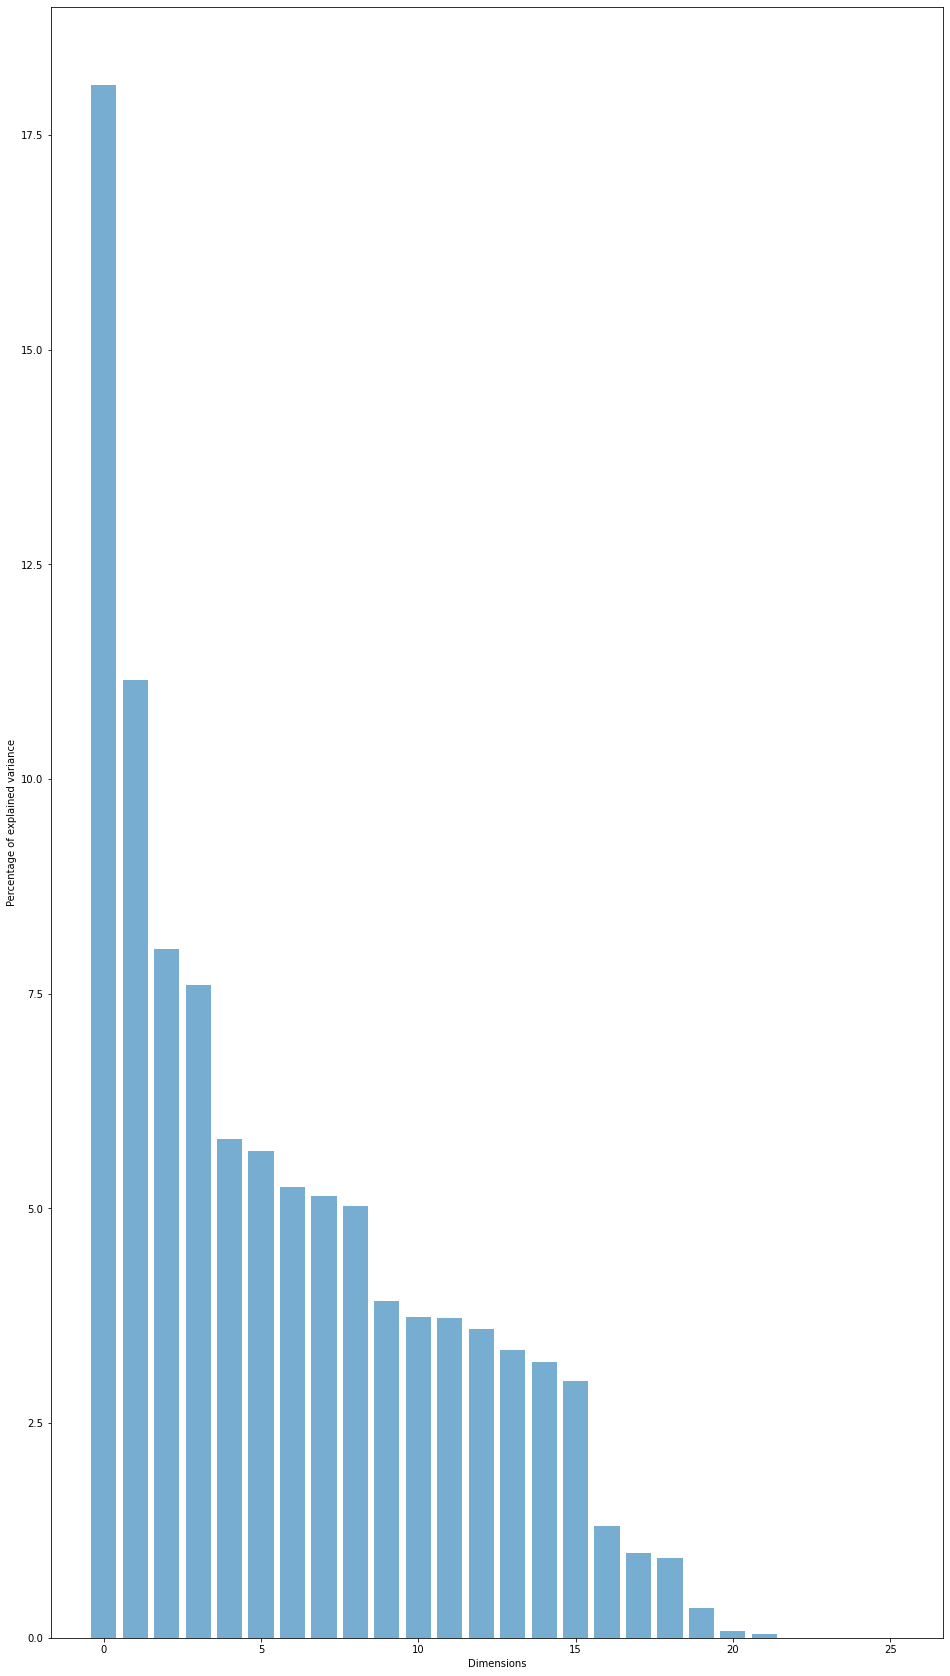

In [62]:
explained_variance=(eig_values / np.sum(eig_values))*100 # Plotting the percentage variance plot, as explained by each princinpal component 
plt.figure(figsize=(16,30))
plt.bar(range(26), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

Calculating the new axes using the eigen vectors:

In [63]:
pc1 = X_train_Norm.dot(eig_vectors[:,0])
pc2 = X_train_Norm.dot(eig_vectors[:,1])
pc3 = X_train_Norm.dot(eig_vectors[:,2])
pc4 = X_train_Norm.dot(eig_vectors[:,3])
pc5 = X_train_Norm.dot(eig_vectors[:,4])
pc6 = X_train_Norm.dot(eig_vectors[:,5])
pc7 = X_train_Norm.dot(eig_vectors[:,6])
pc8 = X_train_Norm.dot(eig_vectors[:,7])
pc9 = X_train_Norm.dot(eig_vectors[:,8])
pc10 = X_train_Norm.dot(eig_vectors[:,9])

In [64]:
X_train_pca= pd.concat([pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10], axis=1)
X_train_pca

,0,1,2,3,4,5,6,7,8,9
0,0.907216,0.091091,-0.678882,1.648905,1.807990,0.983285,0.922777,-0.744587,0.008676,-0.022011
1,0.787948,-0.146829,0.055980,2.069865,-0.416260,-0.017062,1.853890,-0.249196,-0.286556,-0.064232
2,0.787948,-0.146829,0.055980,2.069865,-0.416260,-0.017062,1.853890,-0.249196,-0.286556,-0.064232
3,0.907216,0.091091,-0.678882,1.648905,1.807990,0.983285,0.922777,-0.744587,0.008676,-0.022011
4,0.882139,-0.184613,-1.579819,1.155996,0.081237,1.154578,-0.733602,-1.550152,0.259802,0.000802
...,...,...,...,...,...,...,...,...,...,...
36672,0.813661,-0.186035,1.270962,-1.425398,0.914565,-1.197308,-0.050360,-2.244475,-0.287262,1.555183
36673,0.810143,0.065616,0.875708,1.483151,-2.117583,-0.022880,0.468780,0.986838,0.014439,-0.099292
36674,0.795282,-0.240092,0.014223,2.047429,-0.412437,-0.028362,1.822012,-0.119343,-0.518561,0.429039
36675,0.779781,-0.482411,-0.889847,1.555597,-2.138900,0.142084,0.167140,-0.924535,-0.260929,0.447735


In [65]:
pc1_test = X_test_Norm.dot(eig_vectors[:,0])
pc2_test = X_test_Norm.dot(eig_vectors[:,1])
pc3_test = X_test_Norm.dot(eig_vectors[:,2])
pc4_test = X_test_Norm.dot(eig_vectors[:,3])
pc5_test = X_test_Norm.dot(eig_vectors[:,4])
pc6_test = X_test_Norm.dot(eig_vectors[:,5])
pc7_test = X_test_Norm.dot(eig_vectors[:,6])
pc8_test = X_test_Norm.dot(eig_vectors[:,7])
pc9_test = X_test_Norm.dot(eig_vectors[:,8])
pc10_test = X_test_Norm.dot(eig_vectors[:,9])

In [66]:
X_test_pca= pd.concat([pc1_test,pc2_test,pc3_test,pc4_test,pc5_test,pc6_test,pc7_test,pc8_test,pc9_test,pc10_test], 
                      axis=1)
X_test_pca 

,0,1,2,3,4,5,6,7,8,9
36677,0.878365,0.322854,1.921400,0.219965,1.680701,-1.510861,-0.962772,-0.642463,0.492021,-1.696793
36678,0.815582,0.096191,2.042492,-0.877697,0.333251,0.343142,-1.702086,-0.829685,0.491224,0.297502
36679,0.829507,0.001384,1.662645,1.054327,-0.050474,-1.161695,-0.292721,1.578211,0.559147,-0.207720
36680,0.779622,-0.225634,1.783539,-0.043217,-1.398590,0.691493,-1.029179,1.389593,0.569270,1.788855
36681,0.813625,-0.326651,0.803181,1.617932,1.654215,-1.166937,1.060702,0.471150,0.026399,0.324063
...,...,...,...,...,...,...,...,...,...,...
52392,0.415279,-0.262547,2.074753,-0.892353,0.345205,0.370491,-1.791360,-0.781653,0.132312,0.368535
52393,0.550957,-0.235163,1.780390,-0.045423,-1.387960,0.704538,-1.087492,1.437316,0.335432,1.843604
52394,-0.560334,1.801464,-0.965150,1.658432,1.749548,0.810060,1.325676,-0.801886,1.508369,0.817161
52395,-0.827239,-1.614297,-1.503501,1.012628,0.011730,1.115285,-0.231752,-1.928203,1.935939,-0.495650


In [67]:
class Regression(object):
    
    """ Developing the base regression model class to create a relationship between a scalar dependent variable y and the independent 
    variables X 
    Parameters:

    """
    def __init__(self, n_iterations, learning_rate):
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate

    def init_weights(self, n_features):    # Initializing the weights
        limit = 1 / math.sqrt(n_features)
        self.w = np.random.uniform(-limit, limit, (n_features, ))
        

    def fit(self, X, y):
        
        X = np.column_stack([np.ones([X.shape[0], 1]), X])   # Adding the bias weights
        self.training_errors = []
        self.init_weights(n_features=(X.shape[1]))

        # Gradient descent for n_iterations
        for i in range(0,self.n_iterations):
            y_pred = X.dot(self.w)
            mse = np.mean(0.5 * (y - y_pred)**2 + self.regularization(self.w))
            self.training_errors.append(mse)
            grad_w = (y_pred - y).dot(X) + self.regularization.grad(self.w)
            
            
            self.w -= self.learning_rate * grad_w          # Updating the weights

    def predict(self, X):
        
        # Inserting constant ones for bias weights
        X = np.column_stack([np.ones([X.shape[0], 1]), X])
        y_pred = X.dot(self.w)
        return y_pred

class LinearRegression(Regression):
    
    """
    Linear regression model class

    """
    def __init__(self, n_iterations=100, learning_rate=0.001, gradient_descent=True):
        self.gradient_descent = gradient_descent
        # No regularization
        self.regularization = lambda x: 0
        self.regularization.grad = lambda x: 0
        super(LinearRegression, self).__init__(n_iterations=n_iterations,
                                            learning_rate=learning_rate)
    def fit(self, X, y):
        # If not gradient descent => Least squares approximation of w
        if not self.gradient_descent:
            # Adding the bias term
            X = np.column_stack([np.ones([X.shape[0], 1]), X])
            
            U, S, V = np.linalg.svd(X.T.dot(X))
            S = np.diag(S)
            X_sq_reg_inv = V.dot(np.linalg.pinv(S)).dot(U.T)
            self.w = X_sq_reg_inv.dot(X.T).dot(y)
        else:
            super(LinearRegression, self).fit(X, y)


class Square_Error:
    def __init__(self,reg):
        self.reg = reg
    def sse(self, X, y):
        y_pred = self.reg.predict(X)
        print (y_pred)
        return ((y_pred - y)**2).sum()# {{X^TQ - y}}**2
    def rmse(self, X, y):
        return math.sqrt(self.sse(X, y) / y.size)

In [68]:
# Checking for RMSE value before feature selection

linear_reg = LinearRegression(10000,0.01, False)
linear_reg.fit(l_X_train,y_train)
rms = Square_Error(linear_reg)
rms.rmse(l_X_test, y_test)

[ 4817.15982447 17534.63118978  4955.12937819 ...    95.09678681
   235.49672804   348.79465174]


32869.22449018271

In [69]:
# Checking for RMSE value after the feature selection

linear_reg = LinearRegression(10000,0.01, False)
linear_reg.fit(X_train,y_train)
rms = Square_Error(linear_reg)
rms.rmse(X_test, y_test)

[ -327.35016223 -1193.94881473  -339.67310436 ...    15.28969593
   -11.09364706   -16.26827968]


2241.8228078219004

In [70]:
# Checking for RMSE value after the feature engineering

linear_reg = LinearRegression(10000,0.01, False)
linear_reg.fit(X_train_pca,y_train)
rms = Square_Error(linear_reg)
rms.rmse(X_test_pca, y_test)

[ 13.79253874  -4.96681367  -5.33788443 ...   3.14293243   2.33397545
 -19.86818573]


24.24393108480957